# exponential smoothing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("C:/Users/denem/OneDrive/Belgeler/AI/holidays_events.csv")

In [4]:
df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
df["cf"]=df["cf"].fillna(0)
df["maxCf"]=df["maxCf"].fillna(0)

In [5]:
df["cf"].isnull().sum()
df["maxCf"].isnull().sum()

0

In [6]:
df["newCF"]=df["cf"]+df["maxCf"]

In [7]:
df.isnull().sum()

time     0
xVRMS    0
yVRMS    0
zVRMS    0
temp     0
cf       0
maxCf    0
newCF    0
dtype: int64

In [8]:
del(df["cf"])
del(df["maxCf"])

In [9]:
len(df)

79832

In [10]:
def clean_limit(df_column, low_limit, up_limit=None):
    if up_limit is None:
        filtered = df_column[(df_column >= low_limit)]
        
    else:
        filtered = df_column.loc[(df_column >= low_limit) & (df_column <= up_limit)]
    return filtered

In [51]:
df_x=clean_limit(df["xVRMS"],low_limit=0.5)

In [52]:
type(df_x),len(df_x)

(pandas.core.series.Series, 57455)

In [53]:
slct_df = df.loc[df_x.index]


In [54]:
len(slct_df)

57455

In [55]:
slct_df.head()

,xVRMS,yVRMS,zVRMS,temp,newCF
time,,,,,
2022-06-26 21:35:00,7.53931,4.94363,2.89816,48.95334,3.84012
2022-06-26 21:40:00,7.36773,4.82611,2.85156,49.05156,4.20228
2022-06-26 21:45:00,7.18102,4.84723,2.85830,48.84285,4.10223
2022-06-26 21:50:00,7.28957,4.86776,2.87858,48.89196,4.06978
2022-06-26 21:55:00,7.10303,4.77624,2.82860,48.79374,4.06219


## Korelasyon

In [16]:
df.corr(),len(df)

C:\Users\denem\AppData\Local\Temp\ipykernel_13188\3478289222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),len(df)


(          xVRMS     yVRMS     zVRMS      temp     newCF
 xVRMS  1.000000  0.928570  0.968124  0.784840  0.372722
 yVRMS  0.928570  1.000000  0.888576  0.735978  0.316894
 zVRMS  0.968124  0.888576  1.000000  0.783355  0.390794
 temp   0.784840  0.735978  0.783355  1.000000  0.356842
 newCF  0.372722  0.316894  0.390794  0.356842  1.000000,
 79832)

In [17]:
slct_df.corr(),len(slct_df)

C:\Users\denem\AppData\Local\Temp\ipykernel_13188\1598812109.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  slct_df.corr(),len(slct_df)


(          xVRMS     yVRMS     zVRMS      temp     newCF
 xVRMS  1.000000  0.425837  0.634582  0.584160  0.327757
 yVRMS  0.425837  1.000000  0.182464  0.309897  0.091675
 zVRMS  0.634582  0.182464  1.000000  0.521346  0.323605
 temp   0.584160  0.309897  0.521346  1.000000  0.247773
 newCF  0.327757  0.091675  0.323605  0.247773  1.000000,
 57455)

In [18]:
!pip install statsmodels


In [48]:
df.index = pd.to_datetime(df["time"])

KeyError: 'time'

In [20]:
del(df["time"])

In [21]:
df.head()

,xVRMS,yVRMS,zVRMS,temp,newCF
time,,,,,
2022-06-26 21:35:00,7.53931,4.94363,2.89816,48.95334,3.84012
2022-06-26 21:40:00,7.36773,4.82611,2.85156,49.05156,4.20228
2022-06-26 21:45:00,7.18102,4.84723,2.85830,48.84285,4.10223
2022-06-26 21:50:00,7.28957,4.86776,2.87858,48.89196,4.06978
2022-06-26 21:55:00,7.10303,4.77624,2.82860,48.79374,4.06219


In [22]:
df[:10]

,xVRMS,yVRMS,zVRMS,temp,newCF
time,,,,,
2022-06-26 21:35:00,7.53931,4.943630,2.89816,48.953340,3.84012
2022-06-26 21:40:00,7.36773,4.826110,2.85156,49.051560,4.20228
2022-06-26 21:45:00,7.18102,4.847230,2.85830,48.842850,4.10223
2022-06-26 21:50:00,7.28957,4.867760,2.87858,48.891960,4.06978
2022-06-26 21:55:00,7.10303,4.776240,2.82860,48.793740,4.06219
2022-06-26 22:00:00,6.97452,4.815540,2.86731,48.720070,4.13590
2022-06-26 22:05:00,7.32027,4.884305,2.88624,48.851415,4.36536
2022-06-26 22:10:00,7.00123,4.739380,2.83281,48.701660,4.85682
2022-06-26 22:15:00,7.60896,4.962820,2.91029,48.658690,4.48430


In [23]:
oildata = df["xVRMS"][:10]
fit1 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(oildata, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])


NameError: name 'SimpleExpSmoothing' is not defined

In [24]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Önceki kodun devamı...

# Tahmin değerlerini içeren bir liste oluşturun
forecast_values = [fcast1, fcast2, fcast3]

# Grafik boyutunu ayarlayın
plt.figure(figsize=(12, 8))

# Gerçek verileri çizdirin
plt.plot(oildata, marker="o", color="red")

# Her tahmin değerini çizdirin ve etiketleyin
for i, forecast in enumerate(forecast_values):
    plt.plot(forecast, marker="o", label=forecast.name)

# Grafik üzerinde bir legend oluşturun
plt.legend()

# Grafikleri gösterin
plt.show()


NameError: name 'fcast1' is not defined

In [70]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Veri seti
sales = np.array([100, 110, 120, 130, 140])

# Verileri LSTM giriş formatına dönüştürme
X = sales[:-1]  # Önceki ayların satışları
y = sales[1:]   # Bir sonraki ayın satışı

# LSTM modeli oluşturma
model = Sequential()
model.add(LSTM(64, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Modeli eğitme
X = np.reshape(X, (len(X), 1, 1))
model.fit(X, y, epochs=100, batch_size=1)

# Tahmin yapma
next_month_sales = model.predict(np.array([[sales[-1]]]))
print("Haziran ayı tahmini satış:", next_month_sales[0][0])


Epoch 1/100
4/4 [==============================] - 1s 2ms/step - loss: 15762.3418
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 15744.9668
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 15727.1152
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 15708.0762
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 15687.0254
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 15664.3564
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 15640.3730
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 15616.4199
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 15593.2354
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 15571.5801
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 15547.8262
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 15518.8535
Epoch 13/100


In [71]:

data=slct_df

In [77]:
data["xVRMS"][:10]

time
2022-06-26 21:35:00    7.53931
2022-06-26 21:40:00    7.36773
2022-06-26 21:45:00    7.18102
2022-06-26 21:50:00    7.28957
2022-06-26 21:55:00    7.10303
2022-06-26 22:00:00    6.97452
2022-06-26 22:05:00    7.32027
2022-06-26 22:10:00    7.00123
2022-06-26 22:15:00    7.60896
2022-06-26 22:20:00    7.22664
Name: xVRMS, dtype: float64

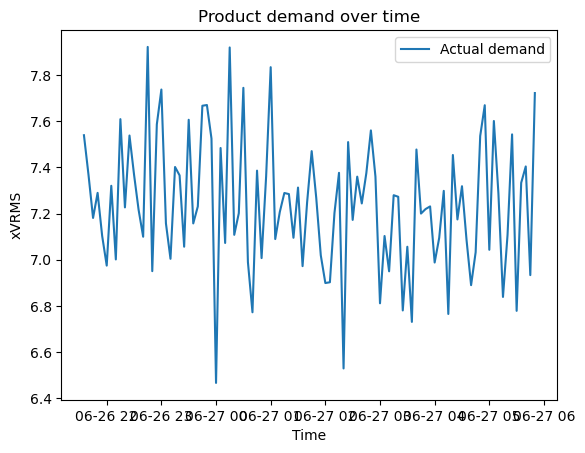

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  xVRMS   No. Observations:                  100
Model:             SimpleExpSmoothing   SSE                             10.857
Optimized:                       True   AIC                           -218.033
Trend:                           None   BIC                           -212.822
Seasonal:                        None   AICC                          -217.612
Seasonal Periods:                None   Date:                 Mon, 29 May 2023
Box-Cox:                        False   Time:                         17:17:32
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4000000                alpha                False
initial_level              7.3731004                

C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)


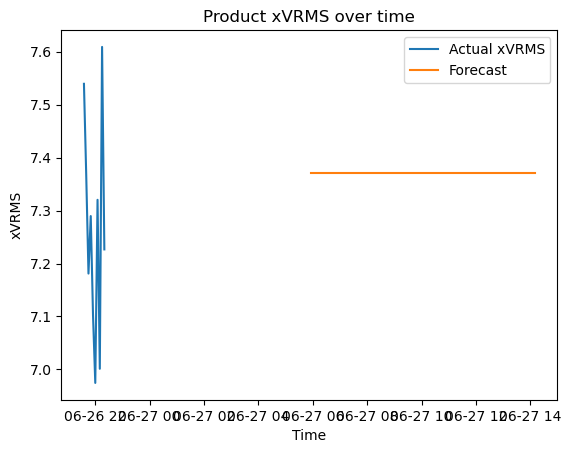

In [86]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing


# Plot data
plt.plot(data["xVRMS"][:100], label="Actual demand")
plt.title("Product demand over time")
plt.xlabel("Time")
plt.ylabel("xVRMS")
plt.legend()
plt.show()

# Fit simple exponential smoothing model with alpha = 0.2
model = SimpleExpSmoothing(data["xVRMS"][:100])
model_fit = model.fit(smoothing_level=0.4)
print(model_fit.summary())

# Forecast for the next 10 periods
forecast = model_fit.forecast(100)
print(forecast)

# Plot actual demand and forecast
plt.plot(data["xVRMS"][:10], label="Actual xVRMS")
plt.plot(forecast, label="Forecast")
plt.title("Product xVRMS over time")
plt.xlabel("Time")
plt.ylabel("xVRMS")
plt.legend()
plt.show()


## Çiftli

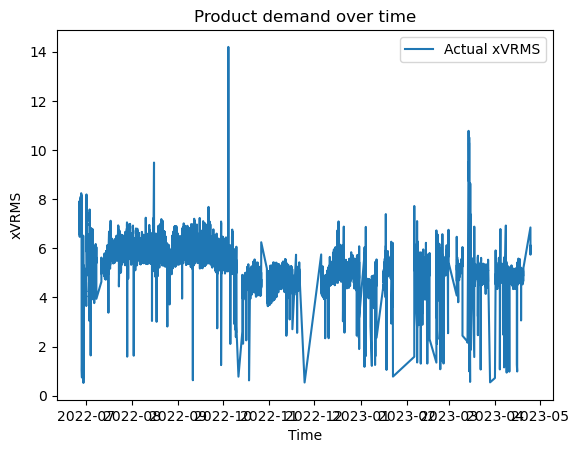

C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    xVRMS   No. Observations:                57455
Model:             ExponentialSmoothing   SSE                          34524.450
Optimized:                         True   AIC                         -29255.800
Trend:                   Multiplicative   BIC                         -29219.965
Seasonal:                          None   AICC                        -29255.799
Seasonal Periods:                  None   Date:                 Mon, 29 May 2023
Box-Cox:                          False   Time:                         17:31:28
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
smoothing_trend            0.80000

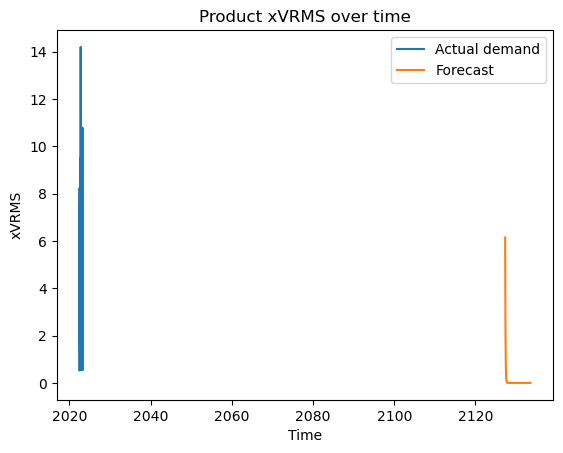

In [101]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing



# Plot data
plt.plot(data["xVRMS"], label="Actual xVRMS")
plt.title("Product demand over time")
plt.xlabel("Time")
plt.ylabel("xVRMS")
plt.legend()
plt.show()

# Fit double exponential smoothing model with alpha = 0.2 and beta = 0.1
model = ExponentialSmoothing(data["xVRMS"], trend="mul")
model_fit = model.fit(smoothing_level=0.2, smoothing_trend=0.8)
print(model_fit.summary())

# Forecast for the next 10 periods
forecast = model_fit.forecast(2280)
print(forecast)

# Plot actual demand and forecast
plt.plot(data["xVRMS"], label="Actual demand")
plt.plot(forecast, label="Forecast")
plt.title("Product xVRMS over time")
plt.xlabel("Time")
plt.ylabel("xVRMS")
plt.legend()
plt.show()


## üçlü

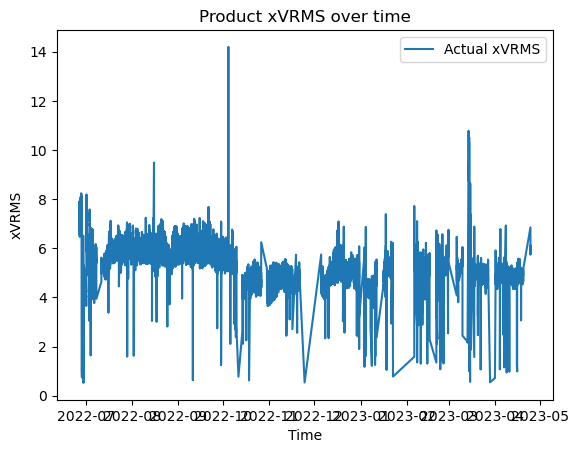

C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1338: RuntimeWarning: overflow encountered in multiply
  alphac * trended(lvls[i - 1], dampen(b[i - 1], phi))
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1344: RuntimeWarning: overflow encountered in multiply
  s[i + m - 1] = y_gamma[i - 1] / trended(
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1341: RuntimeWarning: invalid value encountered in divide
  b[i] = (beta * detrend(lvls[i], lvls[i - 1])) + (
C:\Users\denem\

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    xVRMS   No. Observations:                57455
Model:             ExponentialSmoothing   SSE                                nan
Optimized:                         True   AIC                                nan
Trend:                   Multiplicative   BIC                                nan
Seasonal:                Multiplicative   AICC                               nan
Seasonal Periods:                   288   Date:                 Mon, 29 May 2023
Box-Cox:                          False   Time:                         17:41:26
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.4000000                alpha                False
smoothing_trend       

C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1338: RuntimeWarning: overflow encountered in multiply
  alphac * trended(lvls[i - 1], dampen(b[i - 1], phi))
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1344: RuntimeWarning: overflow encountered in multiply
  s[i + m - 1] = y_gamma[i - 1] / trended(
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1341: RuntimeWarning: invalid value encountered in divide
  b[i] = (beta * detrend(lvls[i], lvls[i - 1])) + (
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1353: RuntimeWarning: overflow encountered in multiply
  trend = trended(lvls, b)


57455    NaN
57456    NaN
57457    NaN
57458    NaN
57459    NaN
          ..
114905   NaN
114906   NaN
114907   NaN
114908   NaN
114909   NaN
Length: 57455, dtype: float64


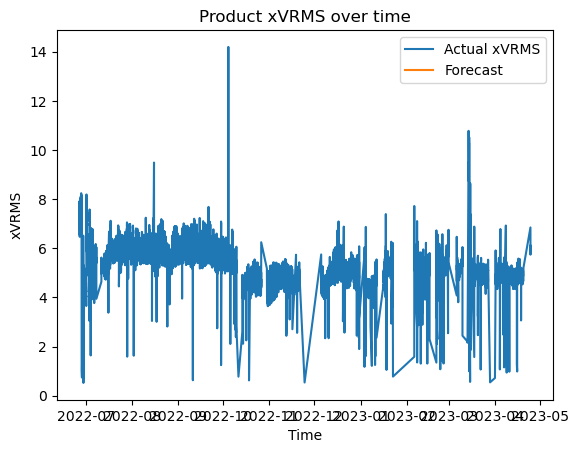

In [107]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

# Plot data
plt.plot(data["xVRMS"], label="Actual xVRMS")
plt.title("Product xVRMS over time")
plt.xlabel("Time")
plt.ylabel("xVRMS")
plt.legend()
plt.show()

# Fit triple exponential smoothing model with alpha = 0.2, beta = 0.1 and gamma = 0.05
model = ExponentialSmoothing(data["xVRMS"], trend="mul", seasonal="mul", seasonal_periods=288)
model_fit = model.fit(smoothing_level=0.4, smoothing_trend=0.4, smoothing_seasonal=0.4)
print(model_fit.summary())

# Forecast for the next 10 periods
forecast = model_fit.forecast(len(data))
print(forecast)

# Plot actual demand and forecast
plt.plot(data["xVRMS"], label="Actual xVRMS")
plt.plot(forecast, label="Forecast")
plt.title("Product xVRMS over time")
plt.xlabel("Time")
plt.ylabel("xVRMS")
plt.legend()
plt.show()


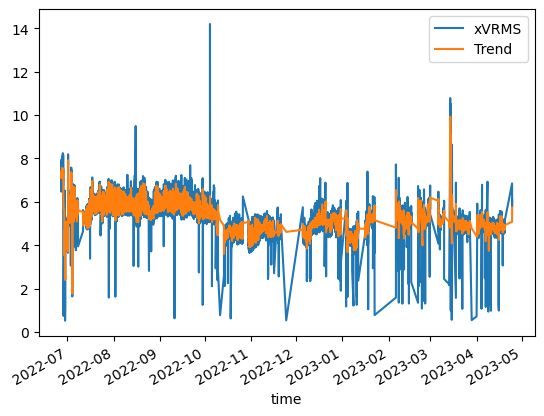

In [104]:
# Calculate trend using rolling mean
data["Trend"] = data["xVRMS"].rolling(window=12).mean()

# Plot time series data and trend
data[["xVRMS", "Trend"]].plot()
plt.show()


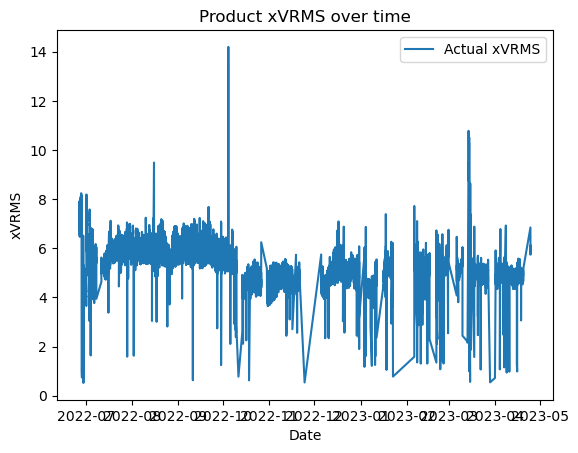

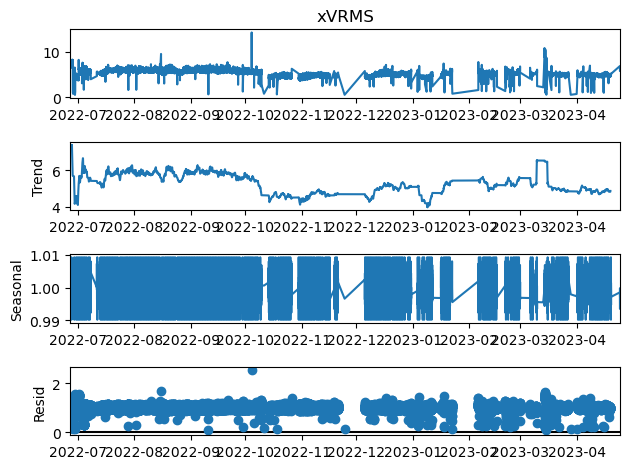

time
2022-06-26 21:35:00   NaN
2022-06-26 21:40:00   NaN
2022-06-26 21:45:00   NaN
2022-06-26 21:50:00   NaN
2022-06-26 21:55:00   NaN
                       ..
2023-04-24 15:55:00   NaN
2023-04-24 16:00:00   NaN
2023-04-24 16:05:00   NaN
2023-04-24 16:10:00   NaN
2023-04-24 16:15:00   NaN
Name: trend, Length: 57455, dtype: float64
time
2022-06-26 21:35:00    0.995591
2022-06-26 21:40:00    0.995510
2022-06-26 21:45:00    0.995561
2022-06-26 21:50:00    0.999742
2022-06-26 21:55:00    1.000125
                         ...   
2023-04-24 15:55:00    0.998486
2023-04-24 16:00:00    0.999807
2023-04-24 16:05:00    0.996688
2023-04-24 16:10:00    0.993517
2023-04-24 16:15:00    0.997537
Name: seasonal, Length: 57455, dtype: float64


In [113]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot data
plt.plot(data["xVRMS"], label="Actual xVRMS")
plt.title("Product xVRMS over time")
plt.xlabel("Date")
plt.ylabel("xVRMS")
plt.legend()
plt.show()


# Apply multiplicative decomposition method with period=12
result = seasonal_decompose(data["xVRMS"], model="multiplicative", period=228)
#result = seasonal_decompose(data["xVRMS"], model="multiplicative")
# Plot result
result.plot()
plt.show()

# Extract trend and seasonality components
trend = result.trend
seasonality = result.seasonal

# Print trend and seasonality components
print(trend)
print(seasonality)


In [29]:
!pip install statsmodels
!pip install pandas


In [30]:
import pandas as pd

# Test verilerini alın
data = slct_df["xVRMS"][5000:10000]

# Veri çerçevesini oluşturun
slc_df = pd.DataFrame(data)


In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Modeli oluşturun
model = ExponentialSmoothing(slc_df)

# Modeli eğitin
model_fit = model.fit()


C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
# Tahmin yapın
yhat = model_fit.predict()

# Sonuçları gözlemleyin
print(yhat)


5000    5.73349
dtype: float64


C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


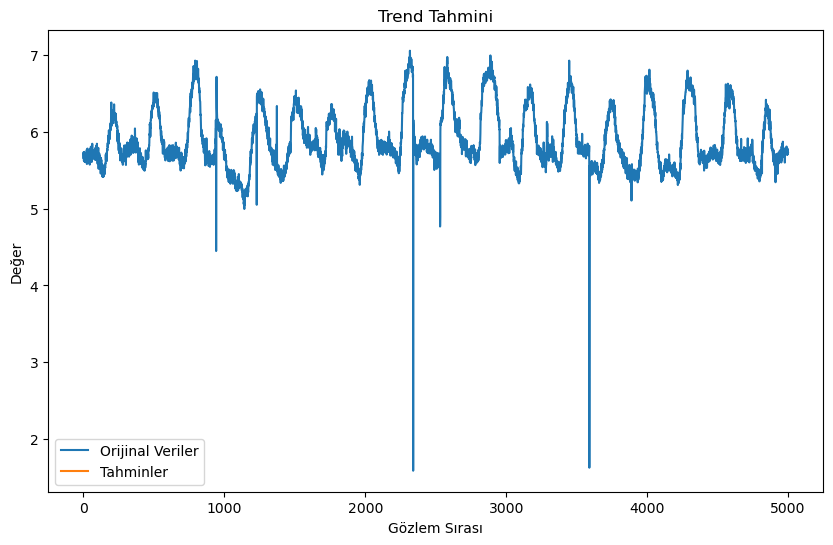

In [33]:
import matplotlib.pyplot as plt

# Orijinal veriler
original_data = data.values

# Tahminler
predictions = yhat.values

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(original_data, label='Orijinal Veriler')
plt.plot(predictions, label='Tahminler')
plt.title('Trend Tahmini')
plt.xlabel('Gözlem Sırası')
plt.ylabel('Değer')
plt.legend()
plt.show()


C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


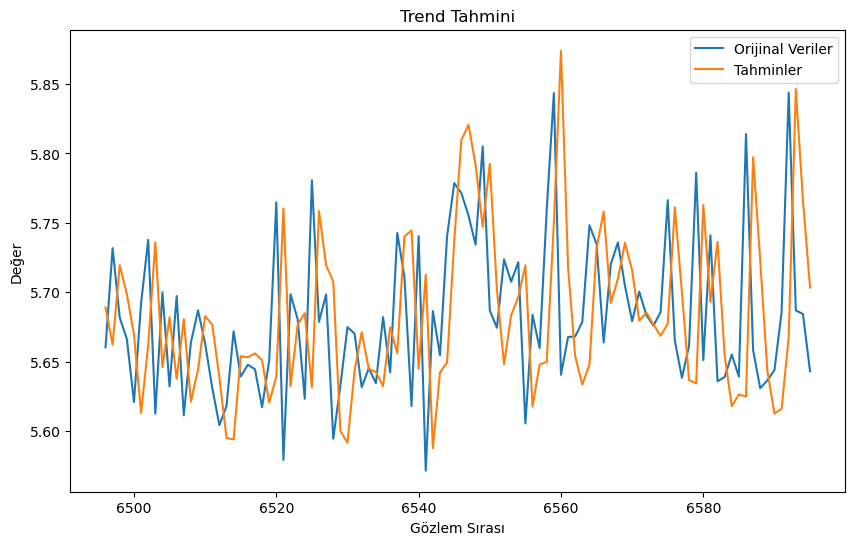

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Verileri hazırla
data = slct_df["xVRMS"][5000:10000]

# Modeli oluştur
model = ExponentialSmoothing(data, trend='add', seasonal=None)

# Modeli eğit
model_fit = model.fit(smoothing_level=0.6,smoothing_trend=0.6)

# Tahmin yap
yhat = model_fit.predict(start=0, end=len(data)-1)

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(data[:100], label='Orijinal Veriler')
plt.plot(yhat[:100], label='Tahminler')
plt.title('Trend Tahmini')
plt.xlabel('Gözlem Sırası')
plt.ylabel('Değer')
plt.legend()
plt.show()


C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


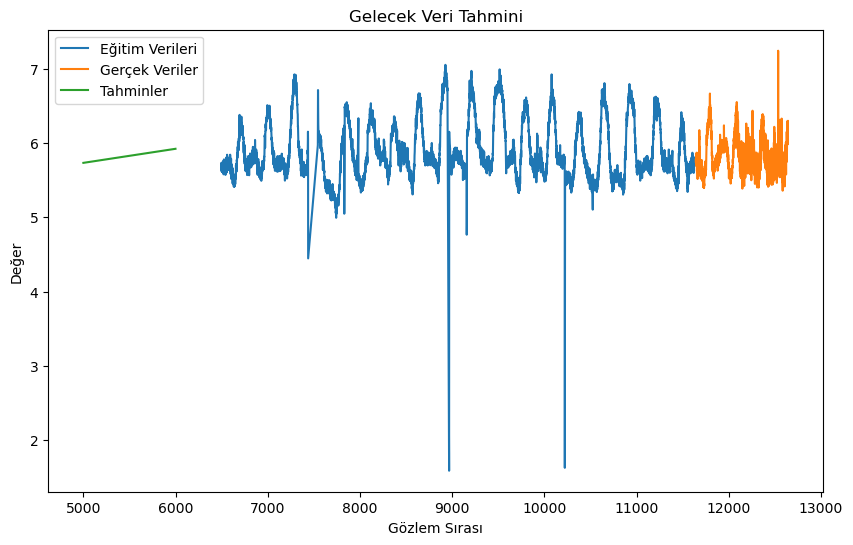

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Verileri hazırla
train_data = slct_df["xVRMS"][5000:10000]
test_data = slct_df["xVRMS"][10000:11000]  # Gelecekteki verileri tahmin etmek için kullanılacak test verileri

# Modeli oluştur ve eğit
model = ExponentialSmoothing(train_data, trend='add', seasonal=None)
model_fit = model.fit()

# Gelecekteki verileri tahmin et
forecast = model_fit.forecast(steps=len(test_data))
forecast.index = test.index


# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Eğitim Verileri')
plt.plot(test_data, label='Gerçek Veriler')
plt.plot(forecast, label='Tahminler')
plt.title('Gelecek Veri Tahmini')
plt.xlabel('Gözlem Sırası')
plt.ylabel('Değer')
plt.legend()
plt.show()


In [43]:
import pandas as pd

# Verileri hazırla
data = slct_df["xVRMS"]

# Verileri aylık gruplandırma
monthly_data = data.resample('M').mean()

# Aylık verileri çizgi grafiği ile görselleştir
plt.figure(figsize=(10, 6))
plt.plot(monthly_data)
plt.title('Aylık Ortalama Veriler')
plt.xlabel('Yıl-Ay')
plt.ylabel('Değer')
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

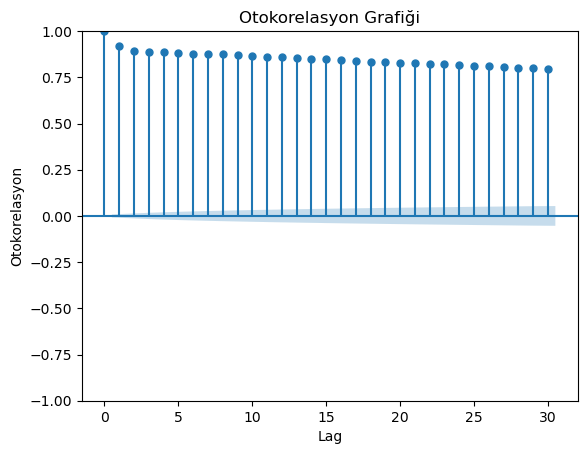

C:\Users\denem\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


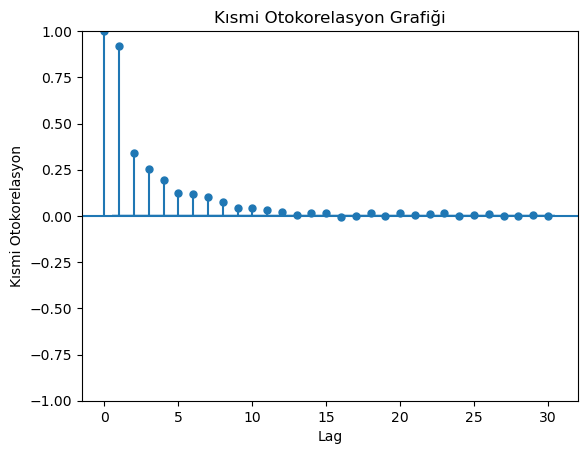

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Verileri hazırla
data = slct_df["xVRMS"]

# Otokorelasyon grafiği
plot_acf(data, lags=30)
plt.title('Otokorelasyon Grafiği')
plt.xlabel('Lag')
plt.ylabel('Otokorelasyon')
plt.show()

# Kısmi otokorelasyon grafiği
plot_pacf(data, lags=30)
plt.title('Kısmi Otokorelasyon Grafiği')
plt.xlabel('Lag')
plt.ylabel('Kısmi Otokorelasyon')
plt.show()


In [45]:
from statsmodels.tsa.stattools import adfuller

# Verileri hazırla
data = slct_df["xVRMS"]

# Dickey-Fuller birim kök testi
result = adfuller(data)
print('ADF İstatistiği:', result[0])
print('P Değeri:', result[1])
print('Kullanılan Gecikme Sayısı:', result[2])
print('Gözlem Sayısı:', result[3])
print('Eleştirel Değerler:')
for key, value in result[4].items():
    print(f'{key}: {value}')



ADF İstatistiği: -10.796976367788462
P Değeri: 2.0635997227817068e-19
Kullanılan Gecikme Sayısı: 36
Gözlem Sayısı: 57418
Eleştirel Değerler:
1%: -3.4304638944646526
5%: -2.8615903391576176
10%: -2.566796793843776


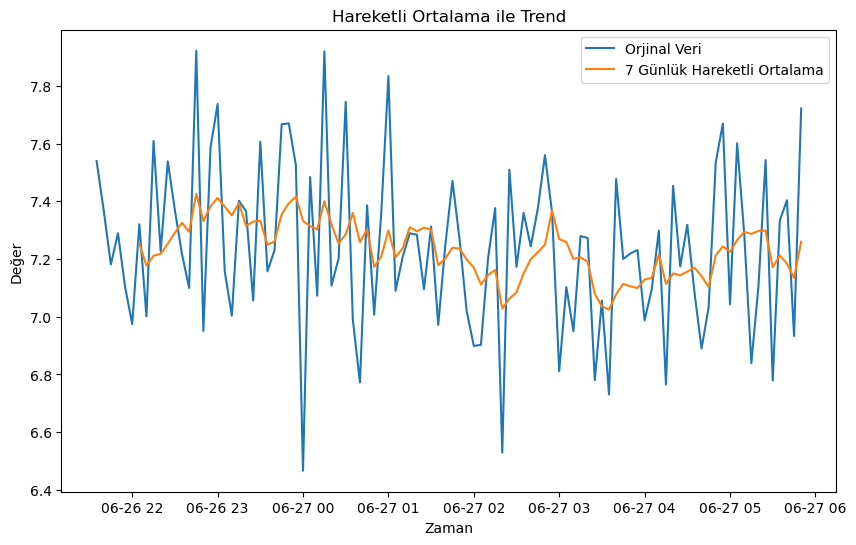

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Verileri hazırla
data = slct_df["xVRMS"]

# Hareketli Ortalama hesaplaması
window_size = 7  # 7 günlük hareketli ortalama
moving_avg = data.rolling(window=window_size).mean()

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(data[:100], label='Orjinal Veri')
plt.plot(moving_avg[:100], label=f'{window_size} Günlük Hareketli Ortalama')
plt.title('Hareketli Ortalama ile Trend')
plt.xlabel('Zaman')
plt.ylabel('Değer')
plt.legend()
plt.show()


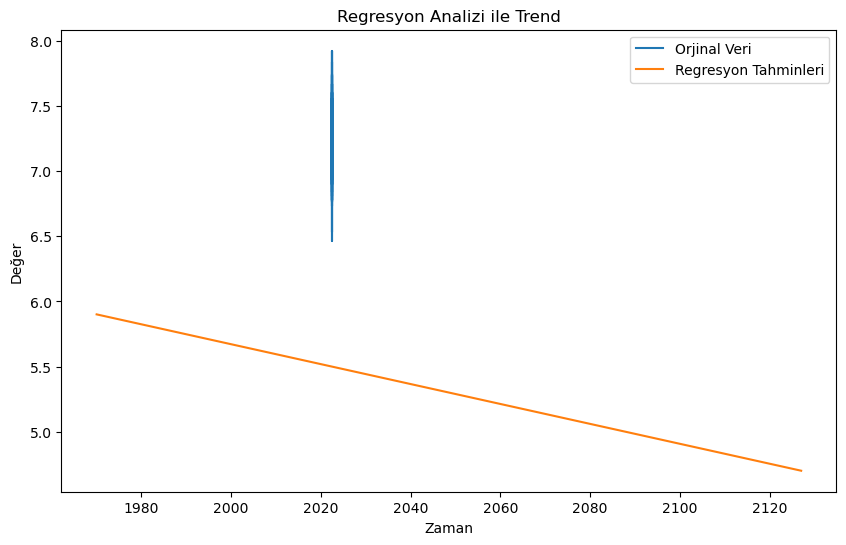

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Verileri hazırla
data = slct_df["xVRMS"]
time = np.arange(len(data)).reshape(-1, 1)

# Regresyon modelini kur
regression_model = LinearRegression()
regression_model.fit(time, data)

# Tahminleri yap
trend_predictions = regression_model.predict(time)

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(data[:100], label='Orjinal Veri')
plt.plot(trend_predictions[:100], label='Regresyon Tahminleri')
plt.title('Regresyon Analizi ile Trend')
plt.xlabel('Zaman')
plt.ylabel('Değer')
plt.legend()
plt.show()


## Holt-Winters

In [66]:
slct_df.tail()

,xVRMS,yVRMS,zVRMS,temp,newCF
time,,,,,
2023-04-24 15:55:00,6.06086,4.51957,1.63495,25.28729,2.35754
2023-04-24 16:00:00,5.80246,4.36672,1.65357,26.10497,2.53804
2023-04-24 16:05:00,5.80947,4.37493,1.59907,26.87845,2.46767
2023-04-24 16:10:00,5.73999,4.32287,1.58820,27.47514,2.41974
2023-04-24 16:15:00,6.10215,4.44223,1.56222,27.81768,2.47096


C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


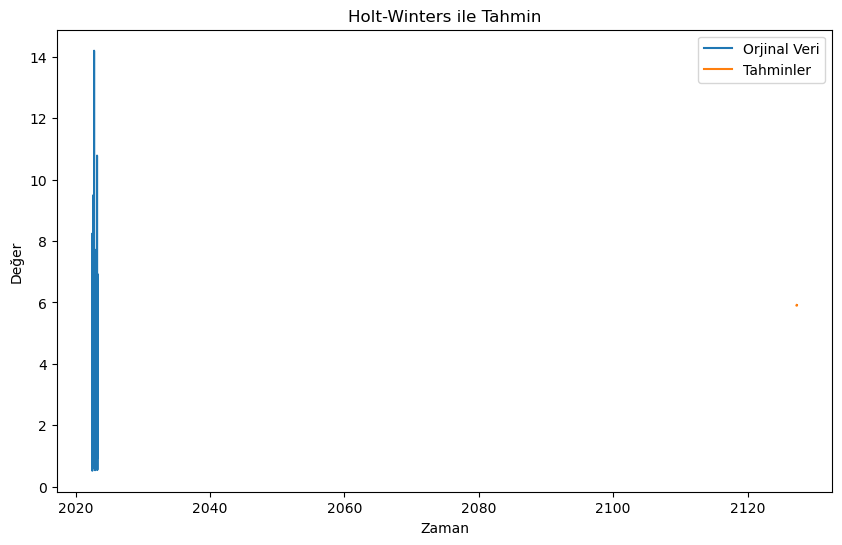

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Verileri hazırla
data = slct_df["xVRMS"]

# Son tarihdeki veri
last_date = data.index[-1]

# Holt-Winters modelini oluştur
model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=12)

# Modeli eğit
model_fit = model.fit()

# Bir hafta sonrasını tahmin et
forecast = model_fit.forecast(steps=7)  # 7 gün sonrasını tahmin etmek için steps=7 kullanılır

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(data, label='Orjinal Veri')
plt.plot(forecast, label='Tahminler')
plt.title('Holt-Winters ile Tahmin')
plt.xlabel('Zaman')
plt.ylabel('Değer')
plt.legend()
plt.show()
